In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
import os

In [195]:
data_dir = ""

In [196]:
os.listdir(data_dir)

['seg_pred', 'seg_test', 'seg_train']

In [197]:
train_path = data_dir+'\\seg_train\\seg_train\\'
test_path = data_dir+'\\seg_test\\seg_test\\'

In [198]:
from matplotlib.image import imread

In [199]:
os.listdir(train_path+'buildings')[0]

'0.jpg'

In [200]:
sample_train = imread(train_path+'buildings'+'\\0.jpg')

In [201]:
sample_train.shape

(150, 150, 3)

In [202]:
sample_train.max() , sample_train.min()

(255, 0)

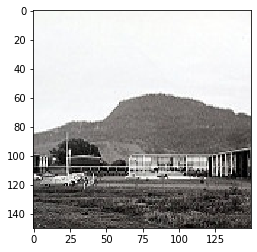

In [203]:
plt.imshow(sample_train)

In [204]:
classes = os.listdir(train_path)

In [205]:
#Train
train_sum=0
print("Train:")
for clas in classes:
    train_sum = train_sum + len(os.listdir(train_path+clas))
    print(str(len(os.listdir(train_path+clas))), end=' ')
    print(imread(train_path+clas+'\\'+os.listdir(train_path+clas)[0]).shape)
print("Total =",train_sum)

#Test
test_sum=0
print("\nTest:")
for clas in classes:
    test_sum = test_sum + len(os.listdir(test_path+clas))
    print(str(len(os.listdir(test_path+clas))), end=' ')
    print(imread(test_path+clas+'\\'+os.listdir(test_path+clas)[0]).shape)
print("Total =",test_sum)

Train:
2191 (150, 150, 3)
2271 (150, 150, 3)
2404 (150, 150, 3)
2512 (150, 150, 3)
2274 (150, 150, 3)
2382 (150, 150, 3)
Total = 14034

Test:
437 (150, 150, 3)
474 (150, 150, 3)
553 (150, 150, 3)
525 (150, 150, 3)
510 (150, 150, 3)
501 (150, 150, 3)
Total = 3000


In [206]:
150*150*3

67500

In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [208]:
img_gen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            rotation_range=10,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest' 
                            )

In [209]:
batch_size=64

In [210]:
train_image_gen = img_gen.flow_from_directory(train_path,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [211]:
test_image_gen = img_gen.flow_from_directory(test_path,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                            shuffle=False)

Found 3000 images belonging to 6 classes.


In [212]:
from tensorflow.keras.models import Sequential

In [213]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [214]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [215]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

In [216]:
from tensorflow.keras.callbacks import EarlyStopping

In [217]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [218]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [219]:
results = model.fit_generator(train_image_gen,
                             epochs=50,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/50
220/220 [==============================] - 221s 1s/step - loss: 1.2171 - acc: 0.5124 - val_loss: 0.9455 - val_acc: 0.6290
Epoch 2/50
220/220 [==============================] - 220s 1s/step - loss: 0.9637 - acc: 0.6323 - val_loss: 0.7896 - val_acc: 0.7120
Epoch 3/50
220/220 [==============================] - 219s 994ms/step - loss: 0.8397 - acc: 0.6913 - val_loss: 0.6883 - val_acc: 0.7530
Epoch 4/50
220/220 [==============================] - 229s 1s/step - loss: 0.7281 - acc: 0.7372 - val_loss: 0.6007 - val_acc: 0.7957
Epoch 5/50
220/220 [==============================] - 193s 878ms/step - loss: 0.6976 - acc: 0.7576 - val_loss: 0.6272 - val_acc: 0.7623
Epoch 6/50
220/220 [==============================] - 191s 870ms/step - loss: 0.6361 - acc: 0.7754 - val_loss: 0.5158 - val_acc: 0.8140
Epoch 7/50
220/220 [==============================] - 187s 849ms/step - loss: 0.5971 - acc: 0.7905 - val_loss: 0.5303 - val_acc: 0.8143
Epoch 8/50
220/220 [==============================] - 185

In [224]:
losses = pd.DataFrame(model.history.history)

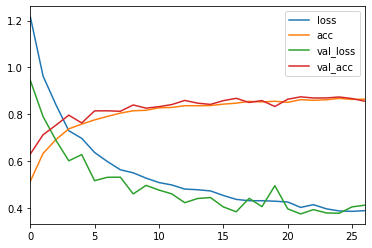

In [227]:
losses.plot()

In [229]:
model.evaluate_generator(test_image_gen)

[0.4146716597866505, 0.865]